In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib


In [5]:
file_bio_bigdata = './DATA/바이오헬스 분야 신기술 활용 현황(2021년~2022년 비교).csv'
bioBigDataDF = pd.read_csv(file_bio_bigdata, encoding='utf-8', index_col=0)
bioBigDataDF


,빅데이터,인공지능,유전자기술,나노기술,사물인터넷,바이오센서,모바일,의료영상,신소재,클라우드,3D프린팅,웨어러블,로봇,가상/증강/혼합현실,블록체인
연도,,,,,,,,,,,,,,,
2021,22.0,13.8,11.0,7.0,8.1,8.2,7.9,5.7,7.9,5.3,4.3,5.0,3.4,2.1,1.2
2022,35.3,18.2,15.7,14.4,9.1,7.2,7.2,6.9,6.6,5.9,5.9,5.3,4.6,2.3,0.9


In [6]:
bioBigDataDF.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 2021 to 2022
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   빅데이터        2 non-null      float64
 1   인공지능        2 non-null      float64
 2   유전자기술       2 non-null      float64
 3   나노기술        2 non-null      float64
 4   사물인터넷       2 non-null      float64
 5   바이오센서       2 non-null      float64
 6   모바일         2 non-null      float64
 7   의료영상        2 non-null      float64
 8   신소재         2 non-null      float64
 9   클라우드        2 non-null      float64
 10  3D프린팅       2 non-null      float64
 11  웨어러블        2 non-null      float64
 12  로봇          2 non-null      float64
 13  가상/증강/혼합현실  2 non-null      float64
 14  블록체인        2 non-null      float64
dtypes: float64(15)
memory usage: 256.0 bytes


In [7]:
bioBigDataDF.index


Index([2021, 2022], dtype='int64', name='연도')

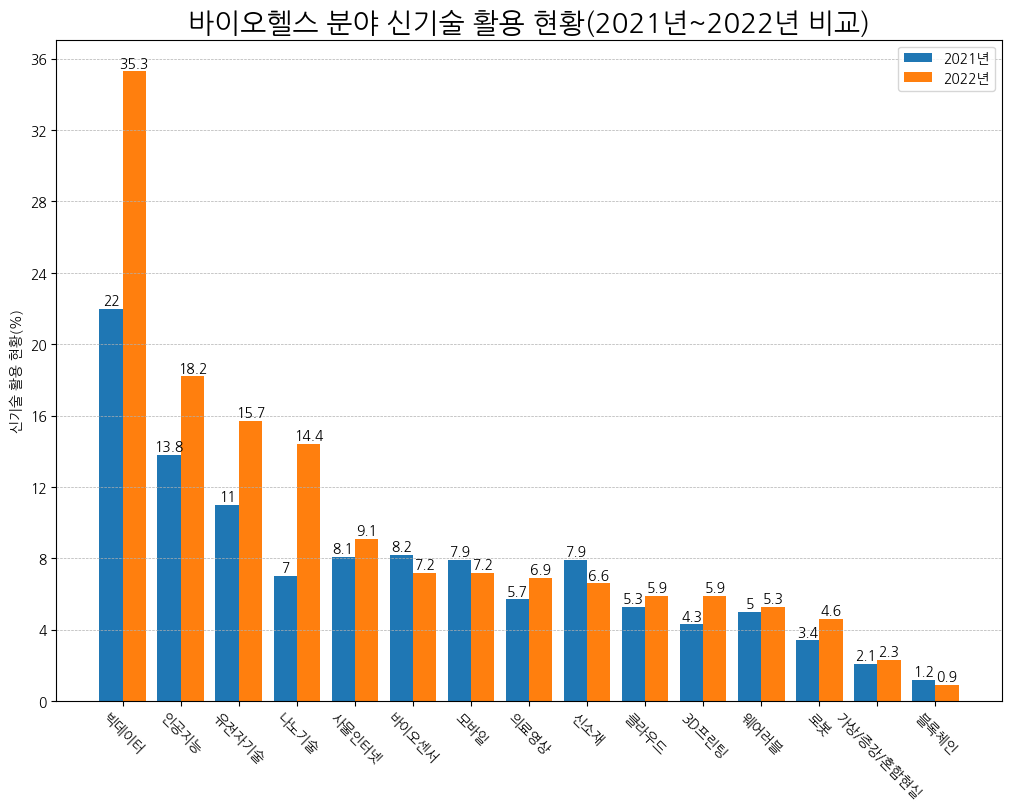

In [61]:
category = tuple(bioBigDataDF.columns)

x = np.arange(len(category))
width = 0.4
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10,8))

for col in bioBigDataDF.index:
    offset = width * multiplier
    rects = ax.bar(x + offset + 0.2, bioBigDataDF.loc[col], width, label=f'{col}년')
    ax.bar_label(rects, padding=1)
    multiplier += 1

ax.set_ylabel('신기술 활용 현황(%)')
ax.set_title('바이오헬스 분야 신기술 활용 현황(2021년~2022년 비교)', fontsize=20)
ax.set_xticks(x + width, category, rotation=315)
ax.set_yticks(np.arange(0, 37, 4))
ax.legend(loc='upper right', ncols=1)
ax.grid(axis='y', linestyle='--', linewidth=0.5)

plt.show()


In [9]:
file_naver_news = './DATA/year_list_naver.txt'
with open(file_naver_news, 'r', encoding='utf-8') as f:
    news_year_list = eval(f.read())
print(len(news_year_list))


2317


In [10]:
yearsSR = pd.Series(news_year_list)
yearsSR


0       2024
1       2024
2       2024
3       2024
4       2024
        ... 
2312    2023
2313    2023
2314    2023
2315    2023
2316    2023
Length: 2317, dtype: object

In [11]:
yearsSR.unique()


array(['2024', '2023', '2022', '2021', '2020', '2019', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012'], dtype=object)

In [22]:
yearsSR2 = yearsSR.value_counts().sort_values()
yearsSR2


2012      1
2013     20
2016     22
2015     28
2014     45
2024     67
2017     73
2018    156
2022    257
2021    260
2020    332
2019    360
2023    696
Name: count, dtype: int64

In [26]:
yearsDF = yearsSR2.to_frame().sort_index()
yearsDF.columns = ['뉴스 기사 수']
yearsDF.index.name = '연도'
yearsDF


,뉴스 기사 수
연도,
2012,1
2013,20
2014,45
2015,28
2016,22
2017,73
2018,156
2019,360
2020,332


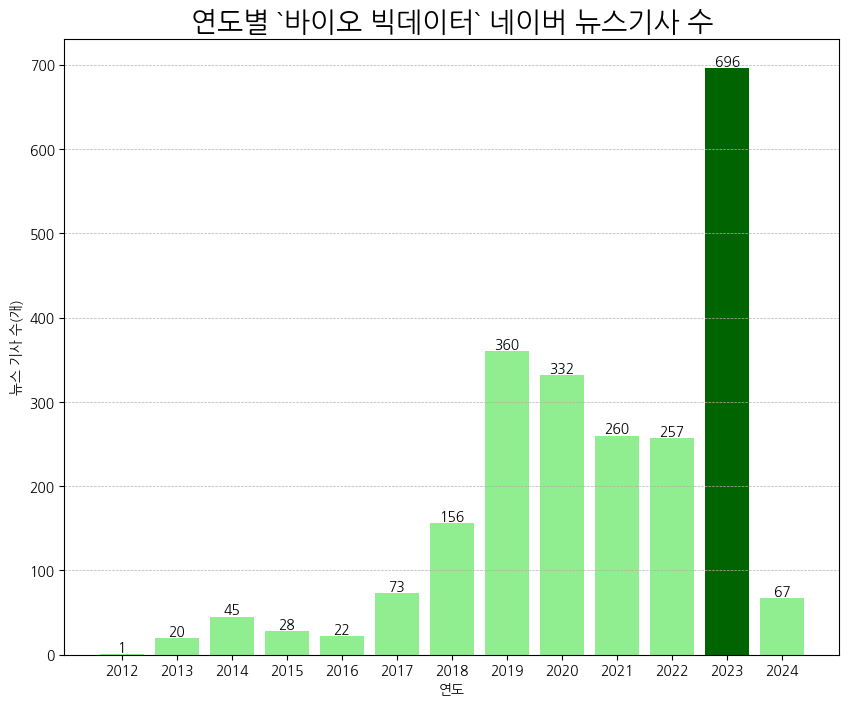

In [73]:
plt.figure(figsize=(10,8))
bar = plt.bar(yearsDF.index, yearsDF['뉴스 기사 수'],
              color=['darkgreen' if year == '2023' else 'lightgreen' for year in yearsDF.index])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha='center', va='bottom')
plt.xlabel('연도')
plt.ylabel('뉴스 기사 수(개)')
plt.title('연도별 `바이오 빅데이터` 네이버 뉴스기사 수', fontsize=20)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()
